In [1]:
import io
from datetime import datetime, timedelta
from pydantic import BaseModel
from time import sleep

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [3]:
import berserk
import chess, chess.pgn

## Functions

In [4]:
# Read PGN string into python-chess object
def read_pgn(game_str):
    pgn = io.StringIO(game_str)
    game = chess.pgn.read_game(pgn)
    return game

In [46]:
# Read python-chess object, play and display it in them on a board.
def play_game(game):
    board = game.board()
    for move in game.mainline_moves():
        clear_output(wait=True)
        print(board)
        board.push(move)
        sleep(1)

In [47]:
# Function that returns list of position evaluations for entire game.
# Scores are in centipawn and from White perspective
# If value is None it's because engine saw checkmate in #n
def read_game_eval(game_node):
    
    if game_node.is_end():
        print(game_node.eval())
        return [None]
    else:
        if game_node.eval()!=None:
            return [game_node.eval().white().score()] + read_game_eval(game_node[0])
        else:
            return read_game_eval(game_node[0])   

## API session setup using berserk

In [48]:
with open('token.txt') as f:
    API_TOKEN = f.readline()[:-1]

In [8]:
session = berserk.TokenSession(API_TOKEN)
client = berserk.Client(session=session)

## API game request settings

In [38]:
last_Xdays = datetime.now()-timedelta(days=100)

In [39]:
user = 'miguel0f'
since = int(berserk.utils.to_millis(last_Xdays))
until = int(berserk.utils.to_millis(datetime.now()))
color = 'black'
as_pgn = True
analysed = True
evals = True
opening = True

In [40]:
games_gen = client.games.export_by_player('miguel0f',
                                    since=since,
                                    color = color,
                                    as_pgn=as_pgn,
                                    analysed=analysed,
                                    evals=evals,
                                    opening=opening)

In [41]:
games_str = {}
for k,game in enumerate(games_gen):
    games_str[k] = game

In [42]:
opening_str = {}
for idx in games_str:
    game = read_pgn(games_str[idx])
    opening_str[idx] = game.headers['Opening']

In [43]:
opening_str

{0: 'Elephant Gambit: Paulsen Countergambit',
 1: 'Elephant Gambit: Paulsen Countergambit',
 2: 'Elephant Gambit: Paulsen Countergambit',
 3: 'Elephant Gambit: Paulsen Countergambit',
 4: 'Englund Gambit Complex: Hartlaub-Charlick Gambit',
 5: 'Elephant Gambit: Paulsen Countergambit',
 6: "King's Gambit Declined: Falkbeer Countergambit Accepted",
 7: 'Elephant Gambit: Paulsen Countergambit',
 8: 'Englund Gambit Complex: Hartlaub-Charlick Gambit',
 9: 'Elephant Gambit: Paulsen Countergambit',
 10: 'Elephant Gambit: Paulsen Countergambit',
 11: "King's Pawn Game: Leonardis Variation",
 12: "Bishop's Opening: Philidor Counterattack",
 13: 'Danish Gambit Declined: Sorensen Defense',
 14: 'Englund Gambit Complex: Hartlaub-Charlick Gambit',
 15: 'Elephant Gambit: Paulsen Countergambit',
 16: 'Portuguese Opening',
 17: 'Elephant Gambit: Paulsen Countergambit',
 18: "English Opening: King's English Variation, Four Knights Variation, Fianchetto Line",
 19: 'Englund Gambit Complex: Hartlaub-Char

r n b . k b n r
p p . . . p p p
. . . . . . . .
. . . q . . B Q
. . . p . . . .
. . . . . . . .
P P P . N P P P
R N . . K . . R


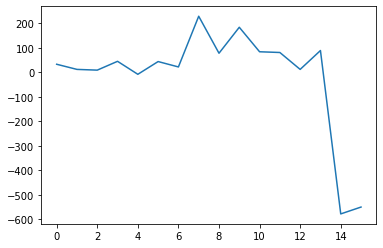

In [49]:
game = read_pgn(games_str[12])
game_eval = read_game_eval(game)
play_game(game)

plt.figure()
plt.plot(game_eval)
plt.show()

## Code snippets to look into data returned by API

In [ ]:
for k in range(len(a)):
    if a[k]['players'][color]['user']['name']!='miguel0f':
        print('ahahah')